## 数据导入

In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv(r'C:\Users\Alchemist\Documents\myProject\datasets\data.csv', header=0,
                      usecols = range(0, 32, 1))

C:\Users\Alchemist\Anaconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 数据展示

In [2]:
from sklearn import preprocessing
from collections import Counter
encoder = preprocessing.LabelEncoder().fit(dataset['diagnosis'])
dataset['diagnosis'] = encoder.transform(dataset['diagnosis'])
print('标签: %s' % encoder.classes_)
print('标签值标准化: %s' % encoder.transform(['benign', 'malignant']))
X = np.array(dataset)
dataset_target = X[:, 1]
dataset_data = X[:, 2:32]
print(Counter(dataset_target))

标签: ['benign' 'malignant']
标签值标准化: [0 1]
Counter({0.0: 357, 1.0: 212})


## 数据均衡：SMOTEENN

In [3]:
from imblearn.combine import SMOTEENN
smo = SMOTEENN()
dataset_data_sm, dataset_target_sm = smo.fit_resample(dataset_data, dataset_target)
Counter(dataset_target_sm)

Counter({0.0: 315, 1.0: 306})

## 数据标准化

In [4]:
from sklearn import preprocessing
import numpy as np
dataset_data_scaled = preprocessing.scale(dataset_data_sm)

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from xgboost import plot_importance
# features and lanbels
X = dataset_data_scaled
Y = dataset_target_sm
# split data into train and test set
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state=90)
#fit modle on training data
model = RandomForestClassifier(random_state=90, max_depth=9, n_estimators=66, max_features=29, criterion="gini")
model.fit(X_train, y_train)
# make predictions on test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred] # float -> integer
#evaluate
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 95.80%


## 展示特征重要性

Feature Ranking
(1) concave points_worst  0.336391
(2) concave points_mean  0.262382
(3) perimeter_worst  0.191281
(4) area_worst  0.028797
(5) concavity_worst  0.026790
(6) radius_worst  0.023541
(7) area_se  0.022545
(8) texture_mean  0.019691
(9) texture_worst  0.016347
(10) smoothness_worst  0.010052


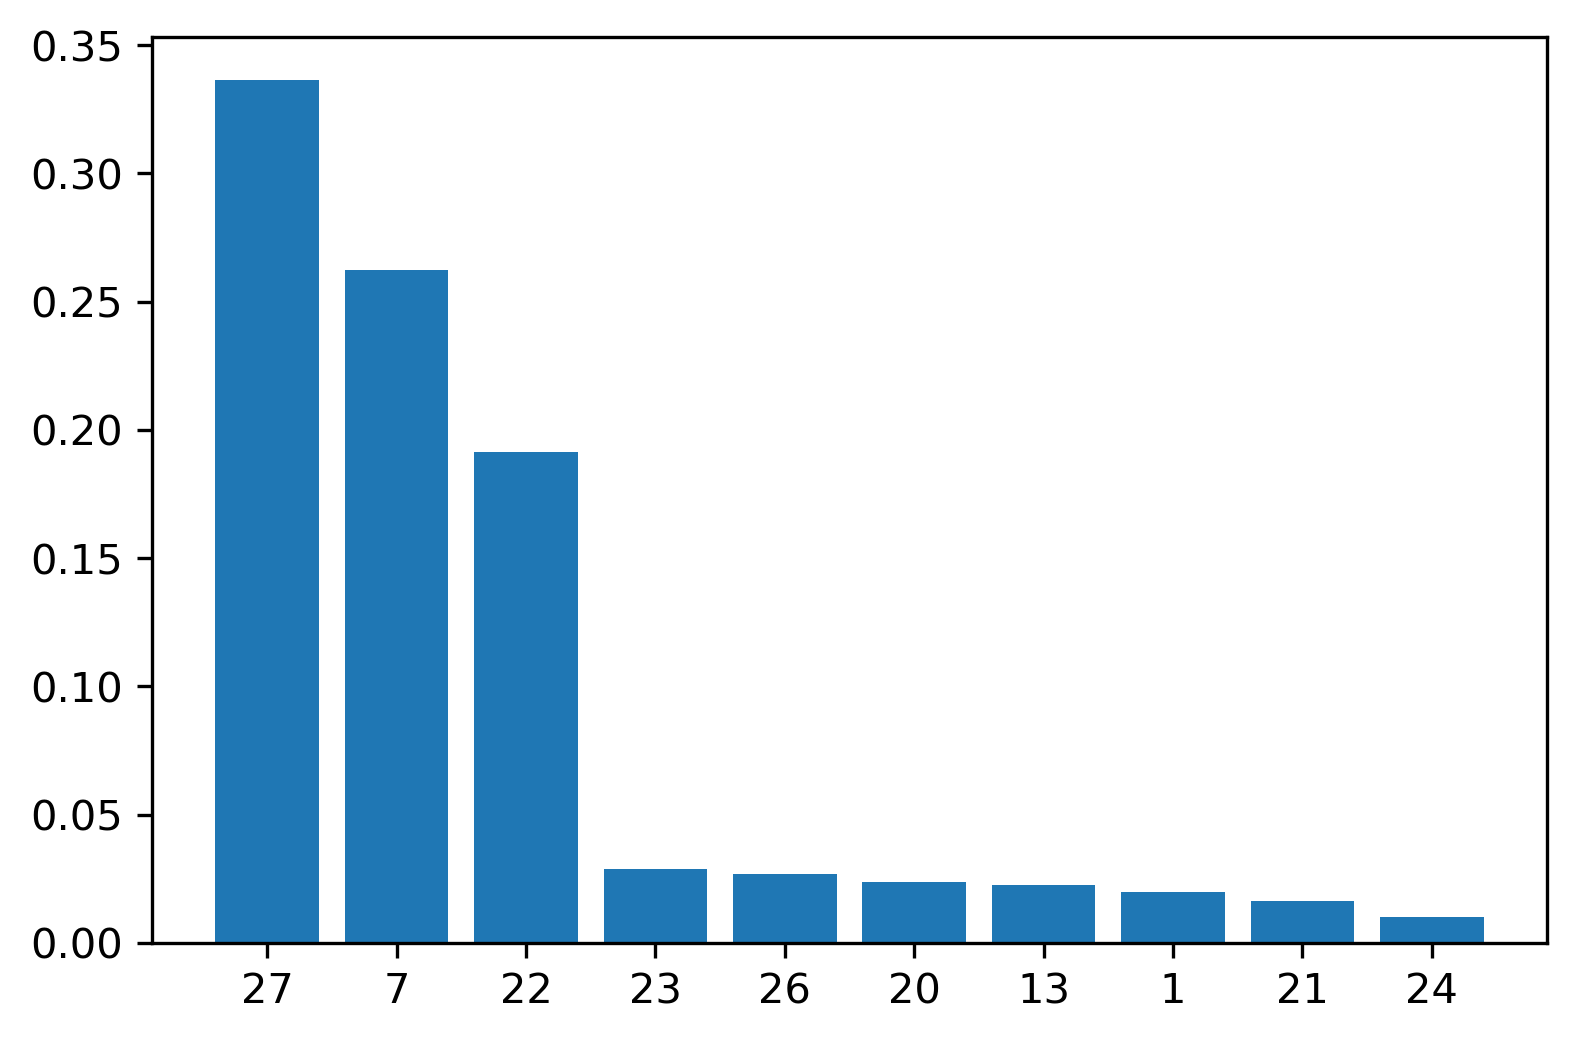

In [16]:
# the importance of each feature
import matplotlib.pyplot as plt
importances = model.feature_importances_
# sort
index = np.argsort(importances)[::-1]
print("Feature Ranking")
for i in range(0, 10):
    print("(%d) %s  %f" % (i+1, dataset.columns[index[i]+2], importances[index[i]]))
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.bar(range(10), importances[index][0:10])
plt.xticks(range(10), index)
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\pictures\RandomForest\imp.png')

others  0.072233
concave points_worst  0.336391
concave points_mean  0.262382
perimeter_worst  0.191281
area_worst  0.028797
concavity_worst  0.026790
radius_worst  0.023541
area_se  0.022545
texture_mean  0.019691
texture_worst  0.016347


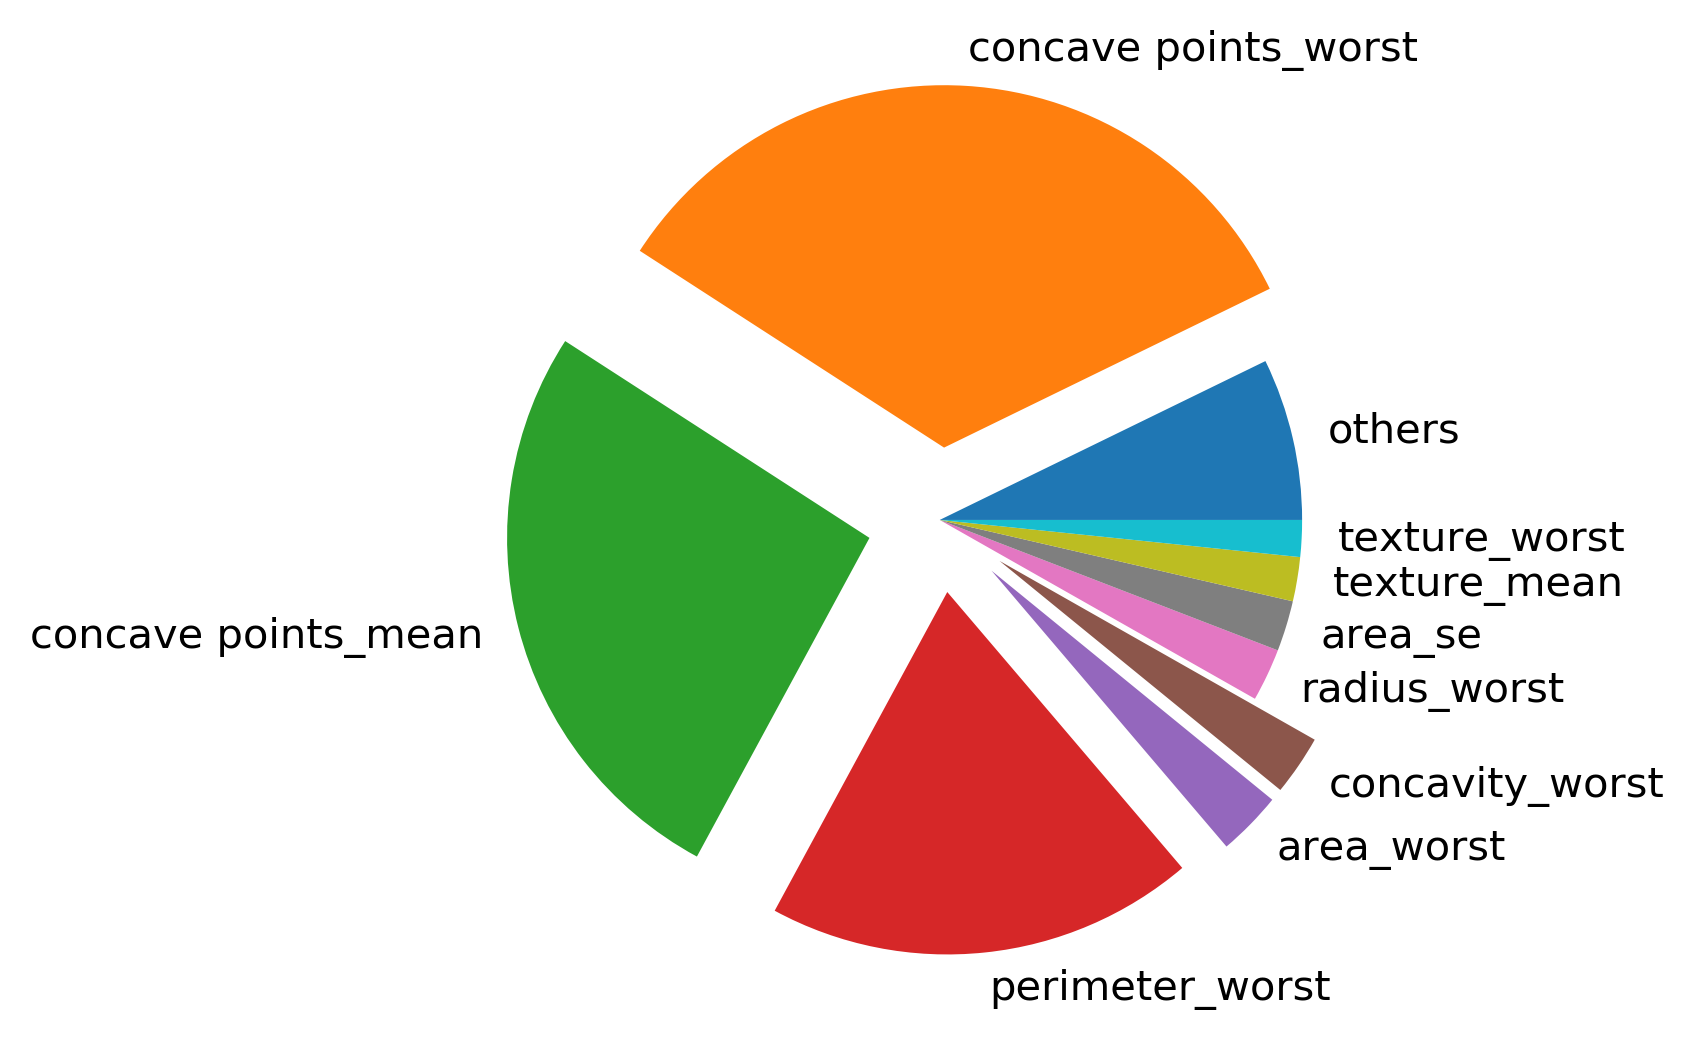

In [21]:
labels = ["others"]
values = [0]
explode = [0]
for i in range(0, 30):
    #print("(%d) %s  %f" % (index[i], dataset.columns[index[i]+2], importances[index[i]]))
    if i < 9:
        labels.append(dataset.columns[index[i]+2])
        values.append(importances[index[i]])
        if i < 5:
            explode.append(0.2)
        else:
            explode.append(0)
    else:
        values[0] = values[0] + importances[index[i]]
for i in range(10):
    print("%s  %f" % (labels[i], values[i]))
#plt.bar(range(11), values)
plt.pie(values,labels=labels, explode=explode)
plt.savefig(r"C:\Users\Alchemist\Documents\myProject\ppt\pictures\RandomForest\pie.png")

In [26]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
Estimators = model.estimators_[0:5]
for index, submodel in enumerate(Estimators):
    filename = 'iris_' + str(index) + '.pdf'
    dot_data = export_graphviz(submodel , out_file=None,
                         feature_names=dataset.columns[2:32],
                         class_names=['benign', 'malignant'],
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    # 使用ipython的终端jupyter notebook显示。
    Image(graph.create_png())
    graph.write_pdf(r"C:\Users\Alchemist\Documents\myProject\ppt\pictures\RandomForest\sub_tree.pdf")

In [18]:
Estimators = model.estimators_[0:5]
Estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=9, max_features=29, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=657362779, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=9, max_features=29, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1371179677, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=9, max_features=29, m

## 单个决策树对照

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
clf.fit(X_train, y_train)
ans = clf.predict(X_test)
predictions = [(value) for value in ans] # float -> integer

accuracy = accuracy_score(y_test, predictions)
cnt = 0
for i in range(len(y_test)):
    if abs(ans[i] - y_test[i]) < 1e-1:
        cnt += 1
    c = (cnt / len(y_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.51%


## 折线图 n_estimators, max_depth

In [9]:
from sklearn.model_selection import train_test_split

def Get_Average(list):
    sum = 0
    for num in list:
        sum += num
    avg = sum / len(list)
    return avg

accuracy = []
max_depth_test = np.arange(2, 11)
estimators_test = np.arange(2, 200, 2)
max_accuracy, best_depth, best_estimators_num = (0.0, 2, 2)
for depth in max_depth_test:
    for estimators in estimators_test:
        current = []
        for r in range(5):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = r)
            clf = RandomForestClassifier(n_estimators=estimators, max_depth=depth, n_jobs=-1, 
                                        criterion="gini")
            clf.fit(X_train, y_train)
            ans = clf.predict(X_test)
            cnt = 0
            for i in range(len(y_test)):
                if ans[i] == y_test[i]:
                    cnt += 1
            c = cnt / len(y_test)
            current.append(c)
        avg = Get_Average(current)
        if avg > max_accuracy:
            max_accuracy = avg
            best_depth = depth
            best_estimators_num = estimators
        accuracy.append(avg)
        print("max_depth = %d  n_estimators = %d  accuracy = %f%%" % (depth, estimators, avg*100))

max_depth = 2  n_estimators = 2  accuracy = 93.146853%
max_depth = 2  n_estimators = 4  accuracy = 93.846154%
max_depth = 2  n_estimators = 6  accuracy = 93.146853%
max_depth = 2  n_estimators = 8  accuracy = 93.986014%
max_depth = 2  n_estimators = 10  accuracy = 93.986014%
max_depth = 2  n_estimators = 12  accuracy = 92.867133%
max_depth = 2  n_estimators = 14  accuracy = 93.566434%
max_depth = 2  n_estimators = 16  accuracy = 94.545455%
max_depth = 2  n_estimators = 18  accuracy = 93.986014%
max_depth = 2  n_estimators = 20  accuracy = 94.125874%
max_depth = 2  n_estimators = 22  accuracy = 94.125874%
max_depth = 2  n_estimators = 24  accuracy = 94.265734%
max_depth = 2  n_estimators = 26  accuracy = 94.265734%
max_depth = 2  n_estimators = 28  accuracy = 94.685315%
max_depth = 2  n_estimators = 30  accuracy = 93.986014%
max_depth = 2  n_estimators = 32  accuracy = 93.846154%
max_depth = 2  n_estimators = 34  accuracy = 93.706294%
max_depth = 2  n_estimators = 36  accuracy = 93.9860

max_depth = 3  n_estimators = 96  accuracy = 95.384615%
max_depth = 3  n_estimators = 98  accuracy = 94.825175%
max_depth = 3  n_estimators = 100  accuracy = 94.965035%
max_depth = 3  n_estimators = 102  accuracy = 95.104895%
max_depth = 3  n_estimators = 104  accuracy = 94.825175%
max_depth = 3  n_estimators = 106  accuracy = 94.965035%
max_depth = 3  n_estimators = 108  accuracy = 94.965035%
max_depth = 3  n_estimators = 110  accuracy = 95.104895%
max_depth = 3  n_estimators = 112  accuracy = 94.965035%
max_depth = 3  n_estimators = 114  accuracy = 94.405594%
max_depth = 3  n_estimators = 116  accuracy = 94.825175%
max_depth = 3  n_estimators = 118  accuracy = 95.244755%
max_depth = 3  n_estimators = 120  accuracy = 95.244755%
max_depth = 3  n_estimators = 122  accuracy = 94.685315%
max_depth = 3  n_estimators = 124  accuracy = 95.104895%
max_depth = 3  n_estimators = 126  accuracy = 94.825175%
max_depth = 3  n_estimators = 128  accuracy = 94.825175%
max_depth = 3  n_estimators = 130

max_depth = 4  n_estimators = 188  accuracy = 95.524476%
max_depth = 4  n_estimators = 190  accuracy = 95.384615%
max_depth = 4  n_estimators = 192  accuracy = 95.664336%
max_depth = 4  n_estimators = 194  accuracy = 95.384615%
max_depth = 4  n_estimators = 196  accuracy = 95.664336%
max_depth = 4  n_estimators = 198  accuracy = 95.384615%
max_depth = 5  n_estimators = 2  accuracy = 93.146853%
max_depth = 5  n_estimators = 4  accuracy = 95.244755%
max_depth = 5  n_estimators = 6  accuracy = 94.685315%
max_depth = 5  n_estimators = 8  accuracy = 95.524476%
max_depth = 5  n_estimators = 10  accuracy = 96.363636%
max_depth = 5  n_estimators = 12  accuracy = 96.643357%
max_depth = 5  n_estimators = 14  accuracy = 95.384615%
max_depth = 5  n_estimators = 16  accuracy = 96.363636%
max_depth = 5  n_estimators = 18  accuracy = 95.384615%
max_depth = 5  n_estimators = 20  accuracy = 95.944056%
max_depth = 5  n_estimators = 22  accuracy = 95.944056%
max_depth = 5  n_estimators = 24  accuracy = 9

max_depth = 6  n_estimators = 84  accuracy = 96.083916%
max_depth = 6  n_estimators = 86  accuracy = 96.083916%
max_depth = 6  n_estimators = 88  accuracy = 96.503497%
max_depth = 6  n_estimators = 90  accuracy = 95.944056%
max_depth = 6  n_estimators = 92  accuracy = 96.083916%
max_depth = 6  n_estimators = 94  accuracy = 96.223776%
max_depth = 6  n_estimators = 96  accuracy = 96.223776%
max_depth = 6  n_estimators = 98  accuracy = 96.083916%
max_depth = 6  n_estimators = 100  accuracy = 96.363636%
max_depth = 6  n_estimators = 102  accuracy = 96.083916%
max_depth = 6  n_estimators = 104  accuracy = 96.363636%
max_depth = 6  n_estimators = 106  accuracy = 96.223776%
max_depth = 6  n_estimators = 108  accuracy = 96.503497%
max_depth = 6  n_estimators = 110  accuracy = 95.804196%
max_depth = 6  n_estimators = 112  accuracy = 95.804196%
max_depth = 6  n_estimators = 114  accuracy = 96.223776%
max_depth = 6  n_estimators = 116  accuracy = 95.944056%
max_depth = 6  n_estimators = 118  accu

max_depth = 7  n_estimators = 176  accuracy = 96.083916%
max_depth = 7  n_estimators = 178  accuracy = 96.643357%
max_depth = 7  n_estimators = 180  accuracy = 96.223776%
max_depth = 7  n_estimators = 182  accuracy = 96.363636%
max_depth = 7  n_estimators = 184  accuracy = 96.643357%
max_depth = 7  n_estimators = 186  accuracy = 96.223776%
max_depth = 7  n_estimators = 188  accuracy = 96.503497%
max_depth = 7  n_estimators = 190  accuracy = 96.363636%
max_depth = 7  n_estimators = 192  accuracy = 96.083916%
max_depth = 7  n_estimators = 194  accuracy = 96.083916%
max_depth = 7  n_estimators = 196  accuracy = 96.223776%
max_depth = 7  n_estimators = 198  accuracy = 96.223776%
max_depth = 8  n_estimators = 2  accuracy = 93.426573%
max_depth = 8  n_estimators = 4  accuracy = 96.503497%
max_depth = 8  n_estimators = 6  accuracy = 95.664336%
max_depth = 8  n_estimators = 8  accuracy = 95.664336%
max_depth = 8  n_estimators = 10  accuracy = 96.083916%
max_depth = 8  n_estimators = 12  accura

max_depth = 9  n_estimators = 72  accuracy = 96.643357%
max_depth = 9  n_estimators = 74  accuracy = 96.503497%
max_depth = 9  n_estimators = 76  accuracy = 95.944056%
max_depth = 9  n_estimators = 78  accuracy = 96.643357%
max_depth = 9  n_estimators = 80  accuracy = 95.804196%
max_depth = 9  n_estimators = 82  accuracy = 95.804196%
max_depth = 9  n_estimators = 84  accuracy = 96.363636%
max_depth = 9  n_estimators = 86  accuracy = 96.363636%
max_depth = 9  n_estimators = 88  accuracy = 96.223776%
max_depth = 9  n_estimators = 90  accuracy = 96.643357%
max_depth = 9  n_estimators = 92  accuracy = 96.223776%
max_depth = 9  n_estimators = 94  accuracy = 96.503497%
max_depth = 9  n_estimators = 96  accuracy = 95.804196%
max_depth = 9  n_estimators = 98  accuracy = 96.503497%
max_depth = 9  n_estimators = 100  accuracy = 96.643357%
max_depth = 9  n_estimators = 102  accuracy = 96.223776%
max_depth = 9  n_estimators = 104  accuracy = 96.363636%
max_depth = 9  n_estimators = 106  accuracy =

max_depth = 10  n_estimators = 162  accuracy = 96.363636%
max_depth = 10  n_estimators = 164  accuracy = 96.223776%
max_depth = 10  n_estimators = 166  accuracy = 96.363636%
max_depth = 10  n_estimators = 168  accuracy = 96.083916%
max_depth = 10  n_estimators = 170  accuracy = 96.083916%
max_depth = 10  n_estimators = 172  accuracy = 95.944056%
max_depth = 10  n_estimators = 174  accuracy = 96.083916%
max_depth = 10  n_estimators = 176  accuracy = 96.083916%
max_depth = 10  n_estimators = 178  accuracy = 96.223776%
max_depth = 10  n_estimators = 180  accuracy = 96.083916%
max_depth = 10  n_estimators = 182  accuracy = 96.223776%
max_depth = 10  n_estimators = 184  accuracy = 95.944056%
max_depth = 10  n_estimators = 186  accuracy = 96.223776%
max_depth = 10  n_estimators = 188  accuracy = 96.083916%
max_depth = 10  n_estimators = 190  accuracy = 96.783217%
max_depth = 10  n_estimators = 192  accuracy = 96.503497%
max_depth = 10  n_estimators = 194  accuracy = 96.223776%
max_depth = 10

## 画出折线图

(10, 99)


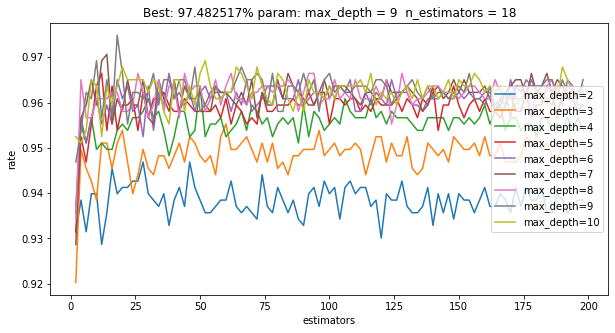

In [13]:
params_values = np.zeros(len(accuracy)).reshape(len(max_depth_test), len(estimators_test))
print(params_values.shape)
for i in range(len(accuracy)):
    params_values[int(i / len(estimators_test)), int(i % len(estimators_test))] = accuracy[i]
fig = plt.figure(figsize = (10, 5))
for i in range(params_values.shape[0]-1):
    plt.plot(estimators_test, params_values[i], label = "max_depth=" + str(i+2))
plt.xlabel('estimators')
plt.ylabel('rate')
plt.title("Best: %f%% param: max_depth = %d  n_estimators = %d" % (max_accuracy*100, best_depth, best_estimators_num))
plt.legend(loc = 'right')
plt.savefig('C:\\Users\\Alchemist\\Documents\\myProject\\ppt\\pictures\\RandomForest\\polygon1all.png')

## n_estimators大致范围

0.9776212832550861 21


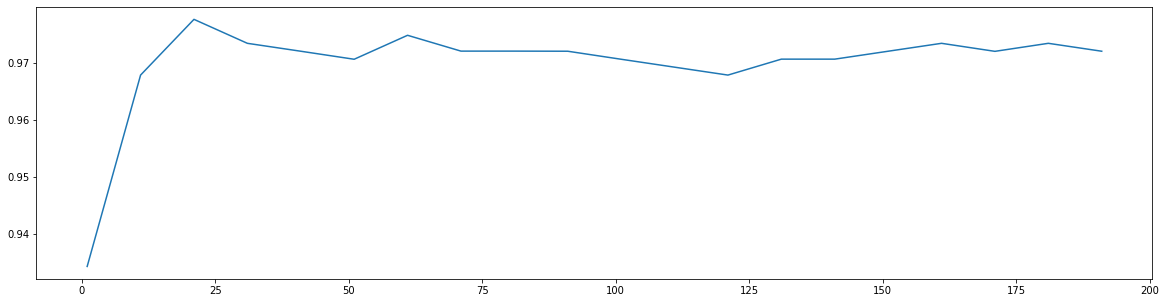

In [15]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
scorel = []
for i in range(0,200,10):
    clf = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(clf,X,Y,cv=10).mean()#十折交叉验证取平均
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\pictures\xgboost\n_est1.png')
plt.show()

0.9776408450704224 66


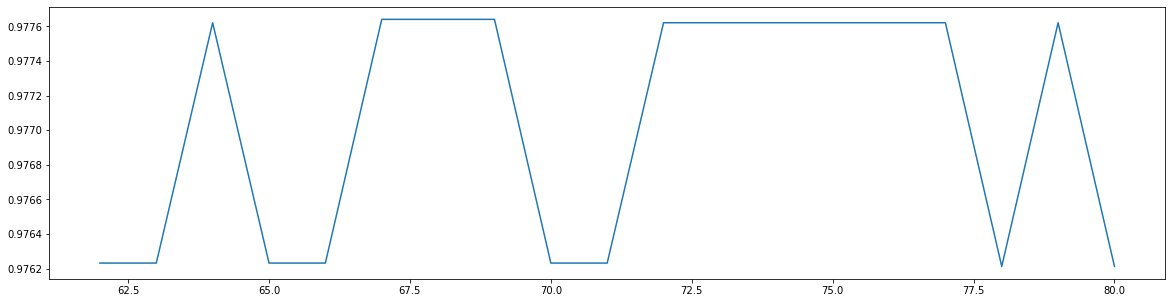

In [76]:
scorel = []
for i in range(62,81,1):
    clf = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(clf,X,Y,cv=10).mean()#十折交叉验证取平均
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+61)
plt.figure(figsize=[20,5])
plt.plot(range(62,81),scorel)
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\pictures\xgboost\n_est2.png')
plt.show()

0.9762323943661972 11


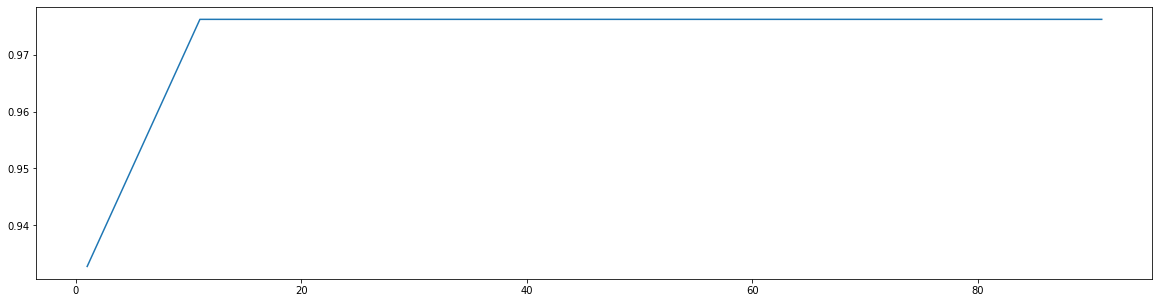

In [79]:
scorel = []
for i in range(0,100,10):
    clf = RandomForestClassifier(max_depth=i+1,
                                 n_jobs=-1, n_estimators=66,
                                 random_state=90)
    score = cross_val_score(clf,X,Y,cv=10).mean()#十折交叉验证取平均
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,100, 10),scorel)
plt.show()

0.9776408450704224 9


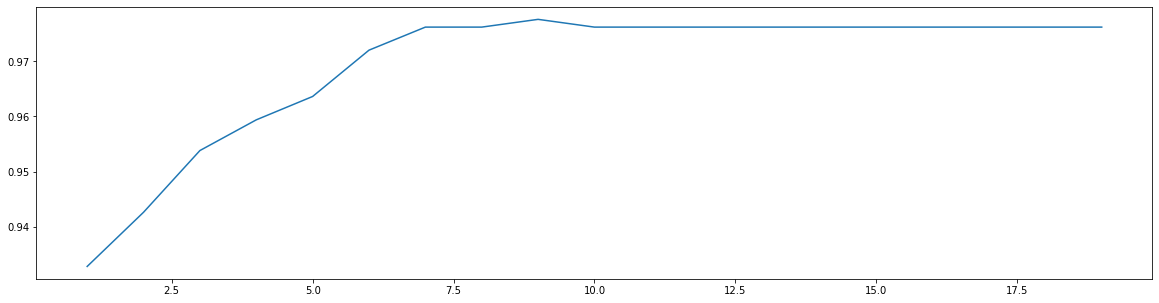

In [82]:
scorel = []
for i in range(1,20,1):
    clf = RandomForestClassifier(max_depth=i,
                                 n_jobs=-1,n_estimators=66,
                                 random_state=90)
    score = cross_val_score(clf,X,Y,cv=10).mean()#十折交叉验证取平均
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,20),scorel)
plt.show()

In [99]:
from sklearn.model_selection import GridSearchCV
import numpy as np
clf = RandomForestClassifier(random_state=90, max_depth=9, n_estimators=18)
param_grid = {"criterion" : ["gini", "entropy"],
             "max_features" : np.arange(2, 30)}
gscv = GridSearchCV(clf,param_grid,cv=10)#网格搜索
gscv.fit(X, Y)
print("Best: %f param: %s" % (gscv.best_score_, gscv.best_params_))

Best: 0.979069 param: {'criterion': 'gini', 'max_features': 29}


In [13]:
from sklearn.model_selection import GridSearchCV
import numpy as np
clf = RandomForestClassifier(random_state=90, max_depth=9, n_estimators=18, 
                            criterion = "gini", max_features = 29)
param_grid = {"min_samples_leaf" : np.arange(1, 2, 1),
             "min_samples_split" : np.arange(100, 101, 1)}
gscv = GridSearchCV(clf,param_grid,cv=10)#网格搜索
gscv.fit(X, Y)
print("Best: %f param: %s" % (gscv.best_score_, gscv.best_params_))

Best: 0.956671 param: {'min_samples_leaf': 1, 'min_samples_split': 100}
